<a href="https://colab.research.google.com/github/DevRichan/Tips_Dataset_Visualization/blob/master/Tips_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Question 1 :
- Men and women who smoke
- Men and women who don't smoke

Notes : 
- I assume that the number of customers present is based on the number in the gender column

<AxesSubplot:xlabel='sex', ylabel='count'>

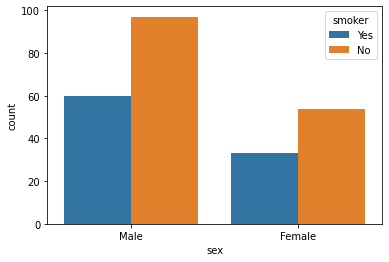

In [ ]:
sns.countplot(data=df,x='sex',hue='smoker')

### Question 1.2 :
- Men and women who smoke
- Men and women who don't smoke

Notes : 
- I assume that the number of customers present is based on the number in the gender column

In [ ]:
groupby = df.groupby(['sex','smoker']).sum()['size']
groupby

sex     smoker
Male    Yes       150
        No        263
Female  Yes        74
        No        140
Name: size, dtype: int64

In [ ]:
total = list(groupby.values)
smoker = ['Yes','No','Yes','No']
sex = ['Male','Male','Female','Female']
df_d = pd.DataFrame([sex,smoker,total],index=['sex','smoker','total']).T
df_d

,sex,smoker,total
0,Male,Yes,150
1,Male,No,263
2,Female,Yes,74
3,Female,No,140


<AxesSubplot:xlabel='smoker', ylabel='total'>

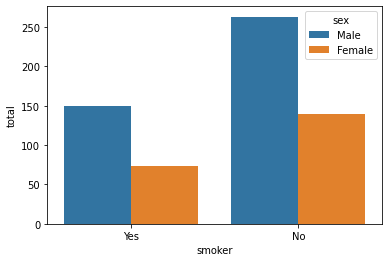

In [ ]:
sns.barplot(data=df_d,x='smoker',y='total',hue='sex')

### Question 2 :
- Total tip of the men and woman who smoke

In [ ]:
groupby = df.groupby(['sex','smoker']).sum()['tip']
groupby

sex     smoker
Male    Yes       183.07
        No        302.00
Female  Yes        96.74
        No        149.77
Name: tip, dtype: float64

In [ ]:
male_yes = groupby.loc['Male']['Yes']
female_yes = groupby.loc['Female']['Yes']

In [ ]:
total = [male_yes,female_yes]
sex = ['male','female']
df_e = pd.DataFrame([sex,total],index=['sex','total']).T
df_e

,sex,total
0,male,183.07
1,female,96.74


<AxesSubplot:xlabel='sex', ylabel='total'>

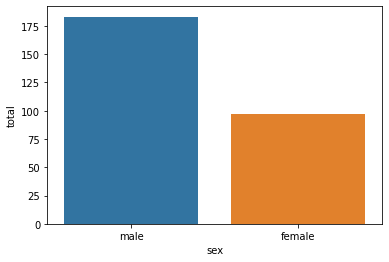

In [ ]:
sns.barplot(data=df_e,x='sex',y='total')

### Question 3 :
- The day with the most lunch
- The day with the most dinner

Notes : 
- I assume that this data is weekly, and the number of subscribers is calculated from the size column

In [ ]:
groupby_data = df.groupby(['day','time',]).sum()['size']
groupby_data

day   time  
Thur  Lunch     150.0
      Dinner      2.0
Fri   Lunch      14.0
      Dinner     26.0
Sat   Lunch       NaN
      Dinner    219.0
Sun   Lunch       NaN
      Dinner    216.0
Name: size, dtype: float64

In [ ]:
days = ['Thur_L','Fri_L','Sat_L','Sun_L','Thur_D','Fri_D','Sat_D','Sun_D']
total = []

for i in range(len(groupby_data)):
    total.append(groupby_data.iloc[i])

df_o = pd.DataFrame([days,total],index=['days','total']).T
df_o

,days,total
0,Thur_L,150
1,Fri_L,2
2,Sat_L,14
3,Sun_L,26
4,Thur_D,NaN
5,Fri_D,219
6,Sat_D,NaN
7,Sun_D,216


In [ ]:
df_l = df_o.head(4)
df_l

,days,total
0,Thur_L,150
1,Fri_L,2
2,Sat_L,14
3,Sun_L,26


In [ ]:
df_d = df_o.tail(4)
df_d

,days,total
4,Thur_D,NaN
5,Fri_D,219
6,Sat_D,NaN
7,Sun_D,216


<AxesSubplot:xlabel='days', ylabel='total'>

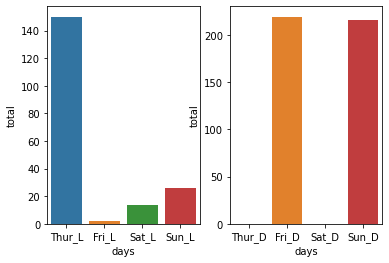

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.barplot(data=df_l,x='days',y='total',ax=axes[0])
sns.barplot(data=df_d,x='days',y='total',ax=axes[1])